In [2]:
# Creating |0> and |1>
import numpy as np

ket0 = np.array([1,0])
ket1 = np.array([0,1])

print("|0> :", ket0)
print("|1> :", ket1)

print("(|0> + |1>)/2:", ket0 / 2 + ket1 / 2)

|0> : [1 0]
|1> : [0 1]
(|0> + |1>)/2: [0.5 0.5]


In [3]:
import array_to_latex as a2l

latex = a2l.to_ltx(ket0)
latex

\begin{bmatrix}
  1.00 &  0.00
\end{bmatrix}


In [14]:
from IPython.display import display, Math

def print_matrix(array):
    matrix = ''
    for row in array:
        try:
            for number in row:
                matrix += f'{number}&'
        except TypeError:
            matrix += f'{row}&'
        matrix = matrix[:-1] + r'\\'
    
    display(Math(r'\begin{bmatrix}'+matrix+r'\end{bmatrix}'))

In [16]:
print(print_matrix(ket1))  

<IPython.core.display.Math object>

None


### 
$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

In [27]:
import numpy as np

INDENT_SPACES = 3

def indent(num_indent=1):
    #Number of indentation spaces
    return num_indent * INDENT_SPACES * ' '

def matrix2latex(matrix, display_style=True):
    #Convert numpy array to latex code as a matrix
    style = ""
    if display_style:
        style = r"\displaystyle" + "\n"
        left_latex = style + indent() + r"\left(" + "\n" + indent(2) + r"\begin{array}"
        right_latex = indent(2) + r"\end{array}" + "\n" + indent() + r"\right)"
        m_cols = matrix.shape[1]
        array_cols = "{" + "r "* m_cols + "}\n"
        elements_latex = ""
    for row in matrix:
        elements_latex = elements_latex + indent(3) + "& ".join([str(x) for x in row]) + r" \\ "+ "\n"
        latex = left_latex + array_cols + elements_latex + right_latex
    return f"$\n{latex}\n$"

def det2latex(matrix, display_style=True):
    #Convert numpy array to latex code as a determinant
    style = ""
    if display_style:
        style = r"\displaystyle"
    left_latex = style + indent() + "\n" + indent() + r"\begin{vmatrix}" + "\n"
    right_latex = indent() + r"\end{vmatrix}"
    m_cols = matrix.shape[1]
    elements_latex = ""
    for row in matrix:
        elements_latex = elements_latex + indent(2) + " & ".join([str(x) for x in row]) + r" \\ " + "\n"
        latex = left_latex + elements_latex + right_latex
    return f"$\n{latex}\n$"

In [33]:
from IPython.display import Math
# Identity 4x4 matrix
identity_4 = np.eye(4, dtype=int)
Math(r"$I_4$ = " + f"{matrix2latex(identity_4)}")

<IPython.core.display.Math object>

In [41]:
from IPython.display import display, Latex


display(Latex(rf'$\begin'{bmatrix} 1.00 &  0.00 \end{bmatrix}'))

SyntaxError: f-string expression part cannot include a backslash (1880822545.py, line 4)

$\ket{0}$

In [4]:
#Creating operations
M1 = np.array([[1,1], [0,0]])
M2 = np.array([[1,1], [1,0]])

print("M1 :", M1)
print("M2 :", M2)

M1 / 2 + M2 / 2

M1 : [[1 1]
 [0 0]]
M2 : [[1 1]
 [1 0]]


array([[1. , 1. ],
       [0.5, 0. ]])

In [10]:
#Matrix multiplication
print(np.matmul(M1, ket1))
print(np.matmul(M1, M2))
print(np.matmul(M2, M1))

[1 0]
[[2 1]
 [0 0]]
[[1 1]
 [1 1]]


In [13]:
#Defining state vector
import qiskit
from qiskit.quantum_info import Statevector

u = Statevector([1 / np.sqrt(2), 1 / np.sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

print("Created succesfully")

Created succesfully


In [21]:
#Displaying state vectors
display(u.draw("latex"))
display(u.draw("text"))

<IPython.core.display.Latex object>

[0.70710678+0.j,0.70710678+0.j]

In [23]:
#Checking if the vector is valid
display(u.is_valid())
display(w.is_valid())

True

False

In [43]:
#Simulating measurements
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
print(display(v.draw("latex")))
v.measure()

<IPython.core.display.Latex object>

None


('1',
 Statevector([ 0.+0.j, -1.+0.j],
             dims=(2,)))

{'0': 539, '1': 461}

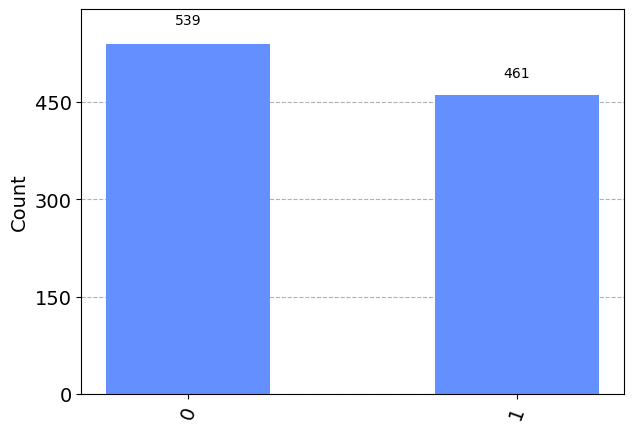

In [46]:
#Simulation of measurements on the system
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)

In [50]:
#Unitary operations

from qiskit.quantum_info import Operator

X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / np.sqrt(2), 1 / np.sqrt(2)], [1 / np.sqrt(2), -1 / np.sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / np.sqrt(2)]])

v = Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

In [59]:
# Quantum Circuits
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

In [60]:
#Evolving quantum state vectors according to a sequence of operations

ket0 = Statevector([1,0])
v = ket0.evolve(circuit)
v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

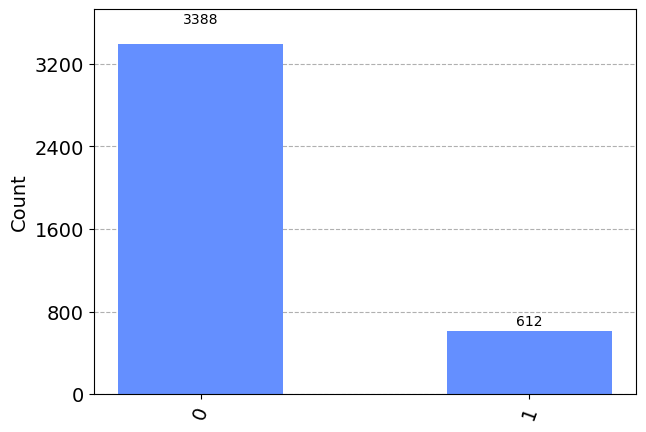

In [61]:
#Simulating the result running this expreiment 4000 times
statistics = v.sample_counts(4000)
plot_histogram(statistics)